# Library Imports

In [7]:
import os
import tensorflow as tf
print(tf.__version__)

2.19.0


In [2]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

# Set Paths to Datasets, Image and Channel Parameters

Dataset link: 
https://btsd.ethz.ch/shareddataBelgiumTSC_Training (171.3MBytes) && https://btsd.ethz.ch/shareddata/BelgiumTSC_Testing (76.5MBytes)/

In [3]:
train_path='Training'
test_path='Testing'

img_height=30
img_width=30
channels=3

# Count Categories

In [4]:

NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

62

# Created a dictionary called classes that maps each class index to a string

In [5]:
classes = {i: str(i) for i in range(0, 62)}
print(classes)

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: '10', 11: '11', 12: '12', 13: '13', 14: '14', 15: '15', 16: '16', 17: '17', 18: '18', 19: '19', 20: '20', 21: '21', 22: '22', 23: '23', 24: '24', 25: '25', 26: '26', 27: '27', 28: '28', 29: '29', 30: '30', 31: '31', 32: '32', 33: '33', 34: '34', 35: '35', 36: '36', 37: '37', 38: '38', 39: '39', 40: '40', 41: '41', 42: '42', 43: '43', 44: '44', 45: '45', 46: '46', 47: '47', 48: '48', 49: '49', 50: '50', 51: '51', 52: '52', 53: '53', 54: '54', 55: '55', 56: '56', 57: '57', 58: '58', 59: '59', 60: '60', 61: '61'}


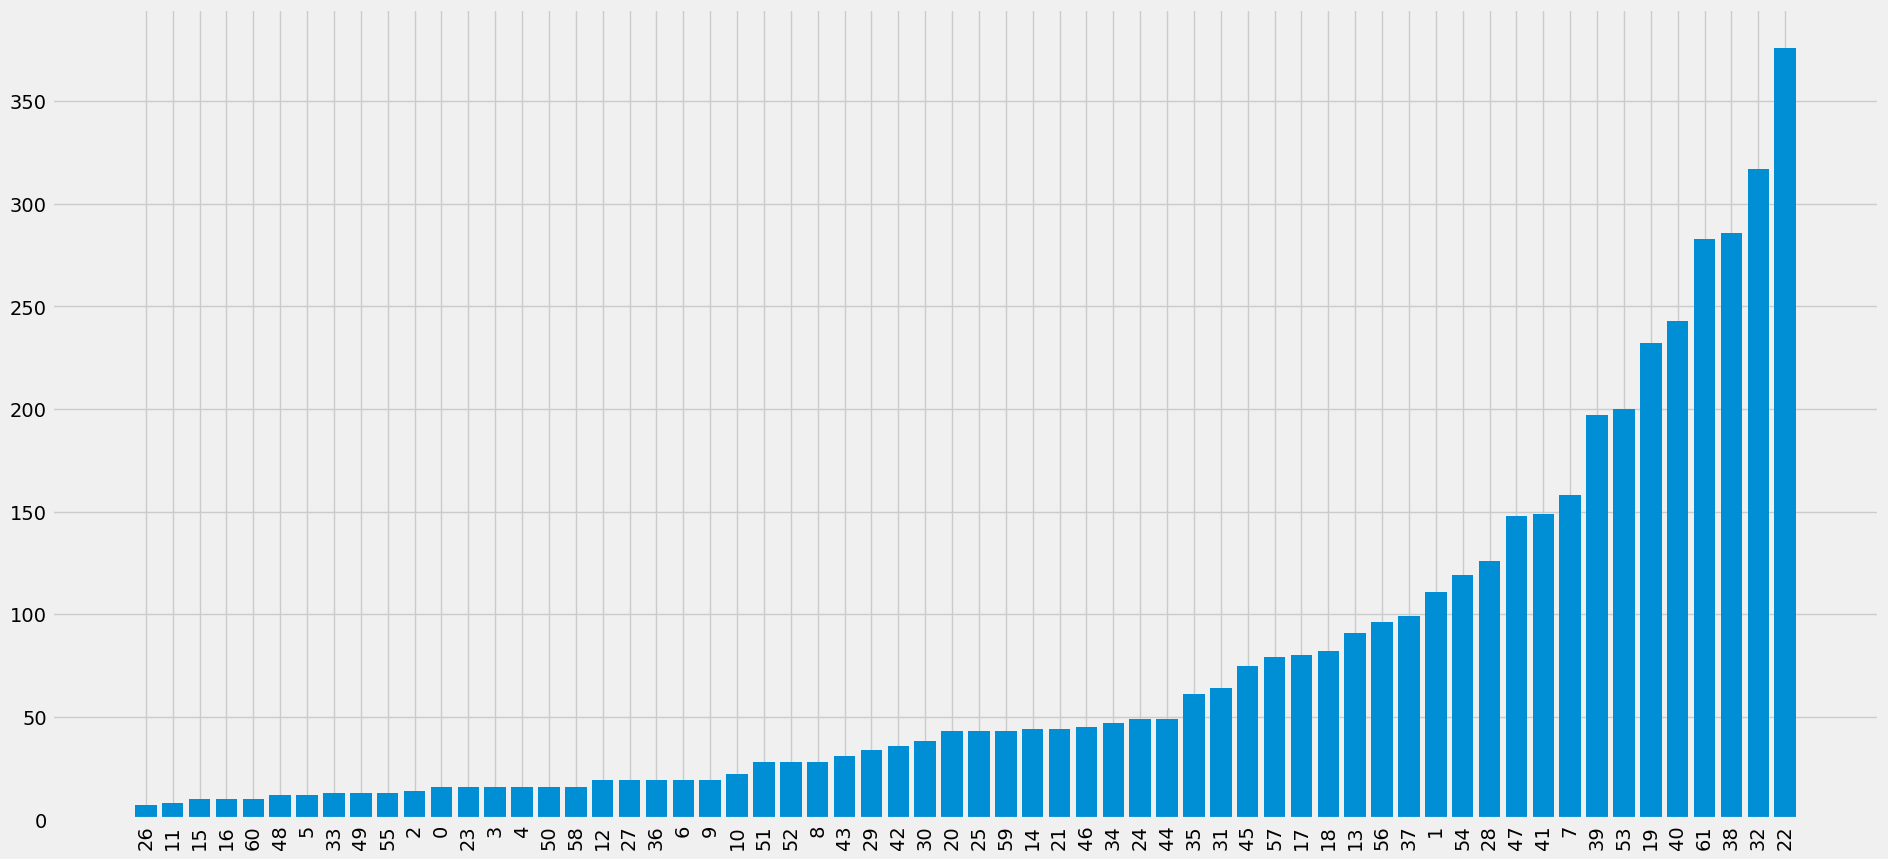

In [6]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

### In this cell, I merged all the .csv annotation files from the Testing dataset into a single CSV file. Each folder contains a GT-xxxxx.csv file with metadata about the images, so I looped through all folders, read each CSV (if it exists), and combined them into one DataFrame. At the end, I saved the result as merged_testing.csv. This makes it easier to work with all test labels in one place. Runned the same program for the Testing file and for the Training part

In [13]:
import os
import pandas as pd

train_path = "Testing"  
folders = os.listdir(train_path)

merged_df = pd.DataFrame()

for k, folder in enumerate(folders):
    if k < 10:
        file_name = f'{train_path}/{folder}/GT-0000{k}.csv'
    else:
        file_name = f'{train_path}/{folder}/GT-000{k}.csv'
    
    if os.path.exists(file_name):
        df = pd.read_csv(file_name, delimiter=';')
        merged_df = pd.concat([merged_df, df], ignore_index=True)
    else:
        print(f" File not found: {file_name}")

# Save merged DataFrame
merged_df.to_csv("merged_testing.csv", index=False, sep=';')
print(" All CSV files merged into merged_traning.csv")


 All CSV files merged into merged_traning.csv


### In this cell, I loaded all the training images from their class folders, resized them to 32×32 pixels, converted them to RGB, and stored them as NumPy arrays. I also assigned a numeric label (i) for each class based on the folder index. This prepares the image data and corresponding labels for training the CNN. (Errors ar for the .csv files that are in the photos folder to just skip them)

In [12]:
from PIL import Image
import os
import numpy as np

image_data = []
image_labels = []

IMG_WIDTH = 32   
IMG_HEIGHT = 32

train_path = "Training"  
folders = os.listdir(train_path)

for i, folder in enumerate(folders):
    path = os.path.join(train_path, folder)
    images = os.listdir(path)

    for img in images:
        try:
            img_path = os.path.join(path, img)
            with Image.open(img_path) as image:
                image = image.convert("RGB")  
                resize_image = image.resize((IMG_WIDTH, IMG_HEIGHT))
                image_data.append(np.array(resize_image))
                image_labels.append(i)
        except Exception as e:
            print(f"⚠️ Error in {img}: {e}")

# Convert to NumPy arrays
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print("✅ Shape of image_data:", image_data.shape)
print("✅ Shape of image_labels:", image_labels.shape)


⚠️ Error in GT-00000.csv: cannot identify image file 'C:\\Users\\unu\\Documents\\Training\\00000\\GT-00000.csv'
⚠️ Error in GT-00001.csv: cannot identify image file 'C:\\Users\\unu\\Documents\\Training\\00001\\GT-00001.csv'
⚠️ Error in GT-00002.csv: cannot identify image file 'C:\\Users\\unu\\Documents\\Training\\00002\\GT-00002.csv'
⚠️ Error in GT-00003.csv: cannot identify image file 'C:\\Users\\unu\\Documents\\Training\\00003\\GT-00003.csv'
⚠️ Error in GT-00004.csv: cannot identify image file 'C:\\Users\\unu\\Documents\\Training\\00004\\GT-00004.csv'
⚠️ Error in GT-00005.csv: cannot identify image file 'C:\\Users\\unu\\Documents\\Training\\00005\\GT-00005.csv'
⚠️ Error in GT-00006.csv: cannot identify image file 'C:\\Users\\unu\\Documents\\Training\\00006\\GT-00006.csv'
⚠️ Error in GT-00007.csv: cannot identify image file 'C:\\Users\\unu\\Documents\\Training\\00007\\GT-00007.csv'
⚠️ Error in GT-00008.csv: cannot identify image file 'C:\\Users\\unu\\Documents\\Training\\00008\\GT-000

### Here, I split the image data into training and validation sets using a 70/30 ratio. I also normalized the pixel values to be between 0 and 1 by dividing by 255, which helps the CNN train more efficiently. Finally, I printed the shapes to confirm that the data was split and processed correctly.

In [14]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (3202, 32, 32, 3)
X_valid.shape (1373, 32, 32, 3)
y_train.shape (3202,)
y_valid.shape (1373,)


### In this cell, I converted the training and validation labels to one-hot encoded vectors using to_categorical. This is required for multi-class classification with a softmax output layer, where each label is represented as a vector with a 1 in the position of the correct class. I also printed the new shapes to verify the conversion.

In [16]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(3202, 62)
(1373, 62)


### Here, I built a CNN using Keras' Sequential model. It includes multiple Conv2D layers to extract features, MaxPool2D layers to reduce spatial size, and BatchNormalization to stabilize training. After flattening the output, I added a dense layer with dropout to prevent overfitting, followed by a final softmax layer with 62 outputs—one for each class.

In [22]:
from tensorflow import keras

model = keras.models.Sequential([
    keras.Input(shape=(IMG_HEIGHT, IMG_WIDTH, channels)),

    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(62, activation='softmax')
])


### In this cell, I set the learning rate and number of training epochs. I used the Adam optimizer with a small learning rate (0.0005) for stable learning. Then, I compiled the model with categorical_crossentropy as the loss function (since it's a multi-class classification problem) and set accuracy as the evaluation metric. This prepares the model for training.

In [62]:
lr = 0.0005
epochs = 30

opt = Adam(learning_rate=lr)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

### In this cell, I applied data augmentation using ImageDataGenerator to artificially expand the training set and improve generalization. The transformations include small rotations, zooms, shifts, and shears. I then trained the model using the augmented data with a batch size of 32 for the set number of epochs (30), while also validating on the separate validation set. This helps the model learn more robust features and avoid overfitting.

In [64]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/30


C:\Users\unu\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


101/101 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.9694 - loss: 0.0873 - val_accuracy: 0.9898 - val_loss: 0.0413
Epoch 2/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.9806 - loss: 0.0761 - val_accuracy: 0.9847 - val_loss: 0.0548
Epoch 3/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.9794 - loss: 0.0727 - val_accuracy: 0.9934 - val_loss: 0.0321
Epoch 4/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.9808 - loss: 0.0652 - val_accuracy: 0.9898 - val_loss: 0.0333
Epoch 5/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.9869 - loss: 0.0414 - val_accuracy: 0.9934 - val_loss: 0.0278
Epoch 6/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.9868 - loss: 0.0557 - val_accuracy: 0.9913 - val_loss: 0.0284
Epoch 7/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9815 - loss: 0.0621 - val_accuracy: 0.9876 - val_loss: 0.0452
Epoch 8/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.9800 - loss: 0.0782 - val_accuracy: 0.99

### Here, I plotted the training history to visualize how the accuracy and loss evolved during training and validation. The graph shows both curves staying close without large divergence, which means the model isn’t overfitting and is generalizing well. This confirms that the CNN is performing effectively on both the training and validation data.

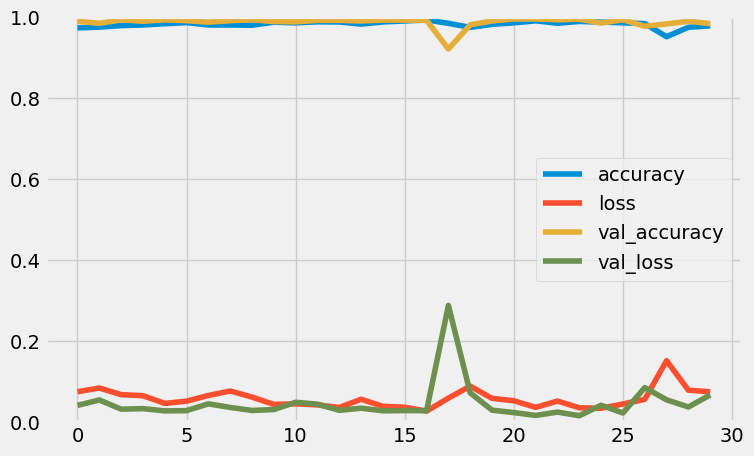

In [66]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Overfitting
### Cu LR=0.005

The model trains good on the traning data. But the val_loss data has big oscillations and that means the lack of generalization.


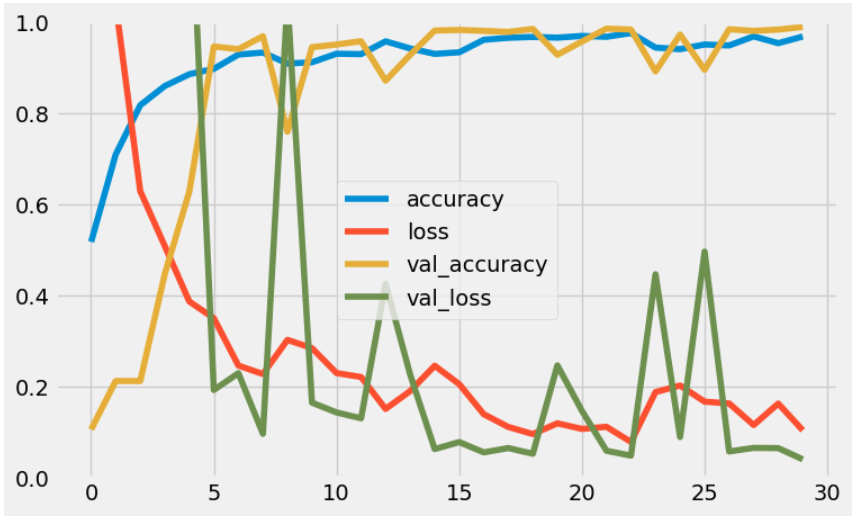

In [68]:
from IPython.display import Image, display
display(Image(filename='overfitting.png'))

### In this cell, I loaded and preprocessed the test images, then used the trained model to predict their classes. I compared the predictions to the true labels and calculated the accuracy, which shows how well the model performs on unseen data.(erors ar from the .csv files that it skips :) )

In [40]:
from PIL import Image
import os
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

IMG_WIDTH = 32
IMG_HEIGHT = 32
df = pd.read_csv('merged_testing.csv', sep=';')
test_path = "Testing"
data = []
#image_labels = df["ClassId"]
image_labels=[]
folders = os.listdir(test_path)
for i, folder in enumerate(folders):
    path = os.path.join(test_path, folder)
    images = os.listdir(path)
    for img in images:
        try:
            img_path = os.path.join(path, img)
            with Image.open(img_path) as image:
                image = image.convert("RGB")
                resize_image = image.resize((IMG_WIDTH, IMG_HEIGHT))
                data.append(np.array(resize_image))
                image_labels.append(i)
        except Exception as e:
            print(f"⚠️ Error in {img}: {e}")

X_test = np.array(data)
X_test = X_test / 255.0

# 🔁 Predict probabilistic
pred = model.predict(X_test)

# ✅ Obține clasele finale
pred_classes = np.argmax(pred, axis=1)

# ✅ Afișează acuratețea
print("Acuratețea este:", accuracy_score(image_labels, pred_classes) * 100)


⚠️ Error in GT-00000.csv: cannot identify image file 'C:\\Users\\unu\\Documents\\Testing\\00000\\GT-00000.csv'
⚠️ Error in GT-00001.csv: cannot identify image file 'C:\\Users\\unu\\Documents\\Testing\\00001\\GT-00001.csv'
⚠️ Error in GT-00002.csv: cannot identify image file 'C:\\Users\\unu\\Documents\\Testing\\00002\\GT-00002.csv'
⚠️ Error in GT-00003.csv: cannot identify image file 'C:\\Users\\unu\\Documents\\Testing\\00003\\GT-00003.csv'
⚠️ Error in GT-00004.csv: cannot identify image file 'C:\\Users\\unu\\Documents\\Testing\\00004\\GT-00004.csv'
⚠️ Error in GT-00005.csv: cannot identify image file 'C:\\Users\\unu\\Documents\\Testing\\00005\\GT-00005.csv'
⚠️ Error in GT-00006.csv: cannot identify image file 'C:\\Users\\unu\\Documents\\Testing\\00006\\GT-00006.csv'
⚠️ Error in GT-00007.csv: cannot identify image file 'C:\\Users\\unu\\Documents\\Testing\\00007\\GT-00007.csv'
⚠️ Error in GT-00008.csv: cannot identify image file 'C:\\Users\\unu\\Documents\\Testing\\00008\\GT-00008.csv'
⚠

### In this cell, I created a confusion matrix to visualize how well the model classified each class. The heatmap shows the number of correct and incorrect predictions for each label. Most values are along the diagonal, meaning the model predicts the correct class most of the time confirming good performance.

The main diagonal is intensely colored → most labels were correctly classified.

The values ​​off the diagonal are almost all 0 or very small → the model has high accuracy.

<Axes: >

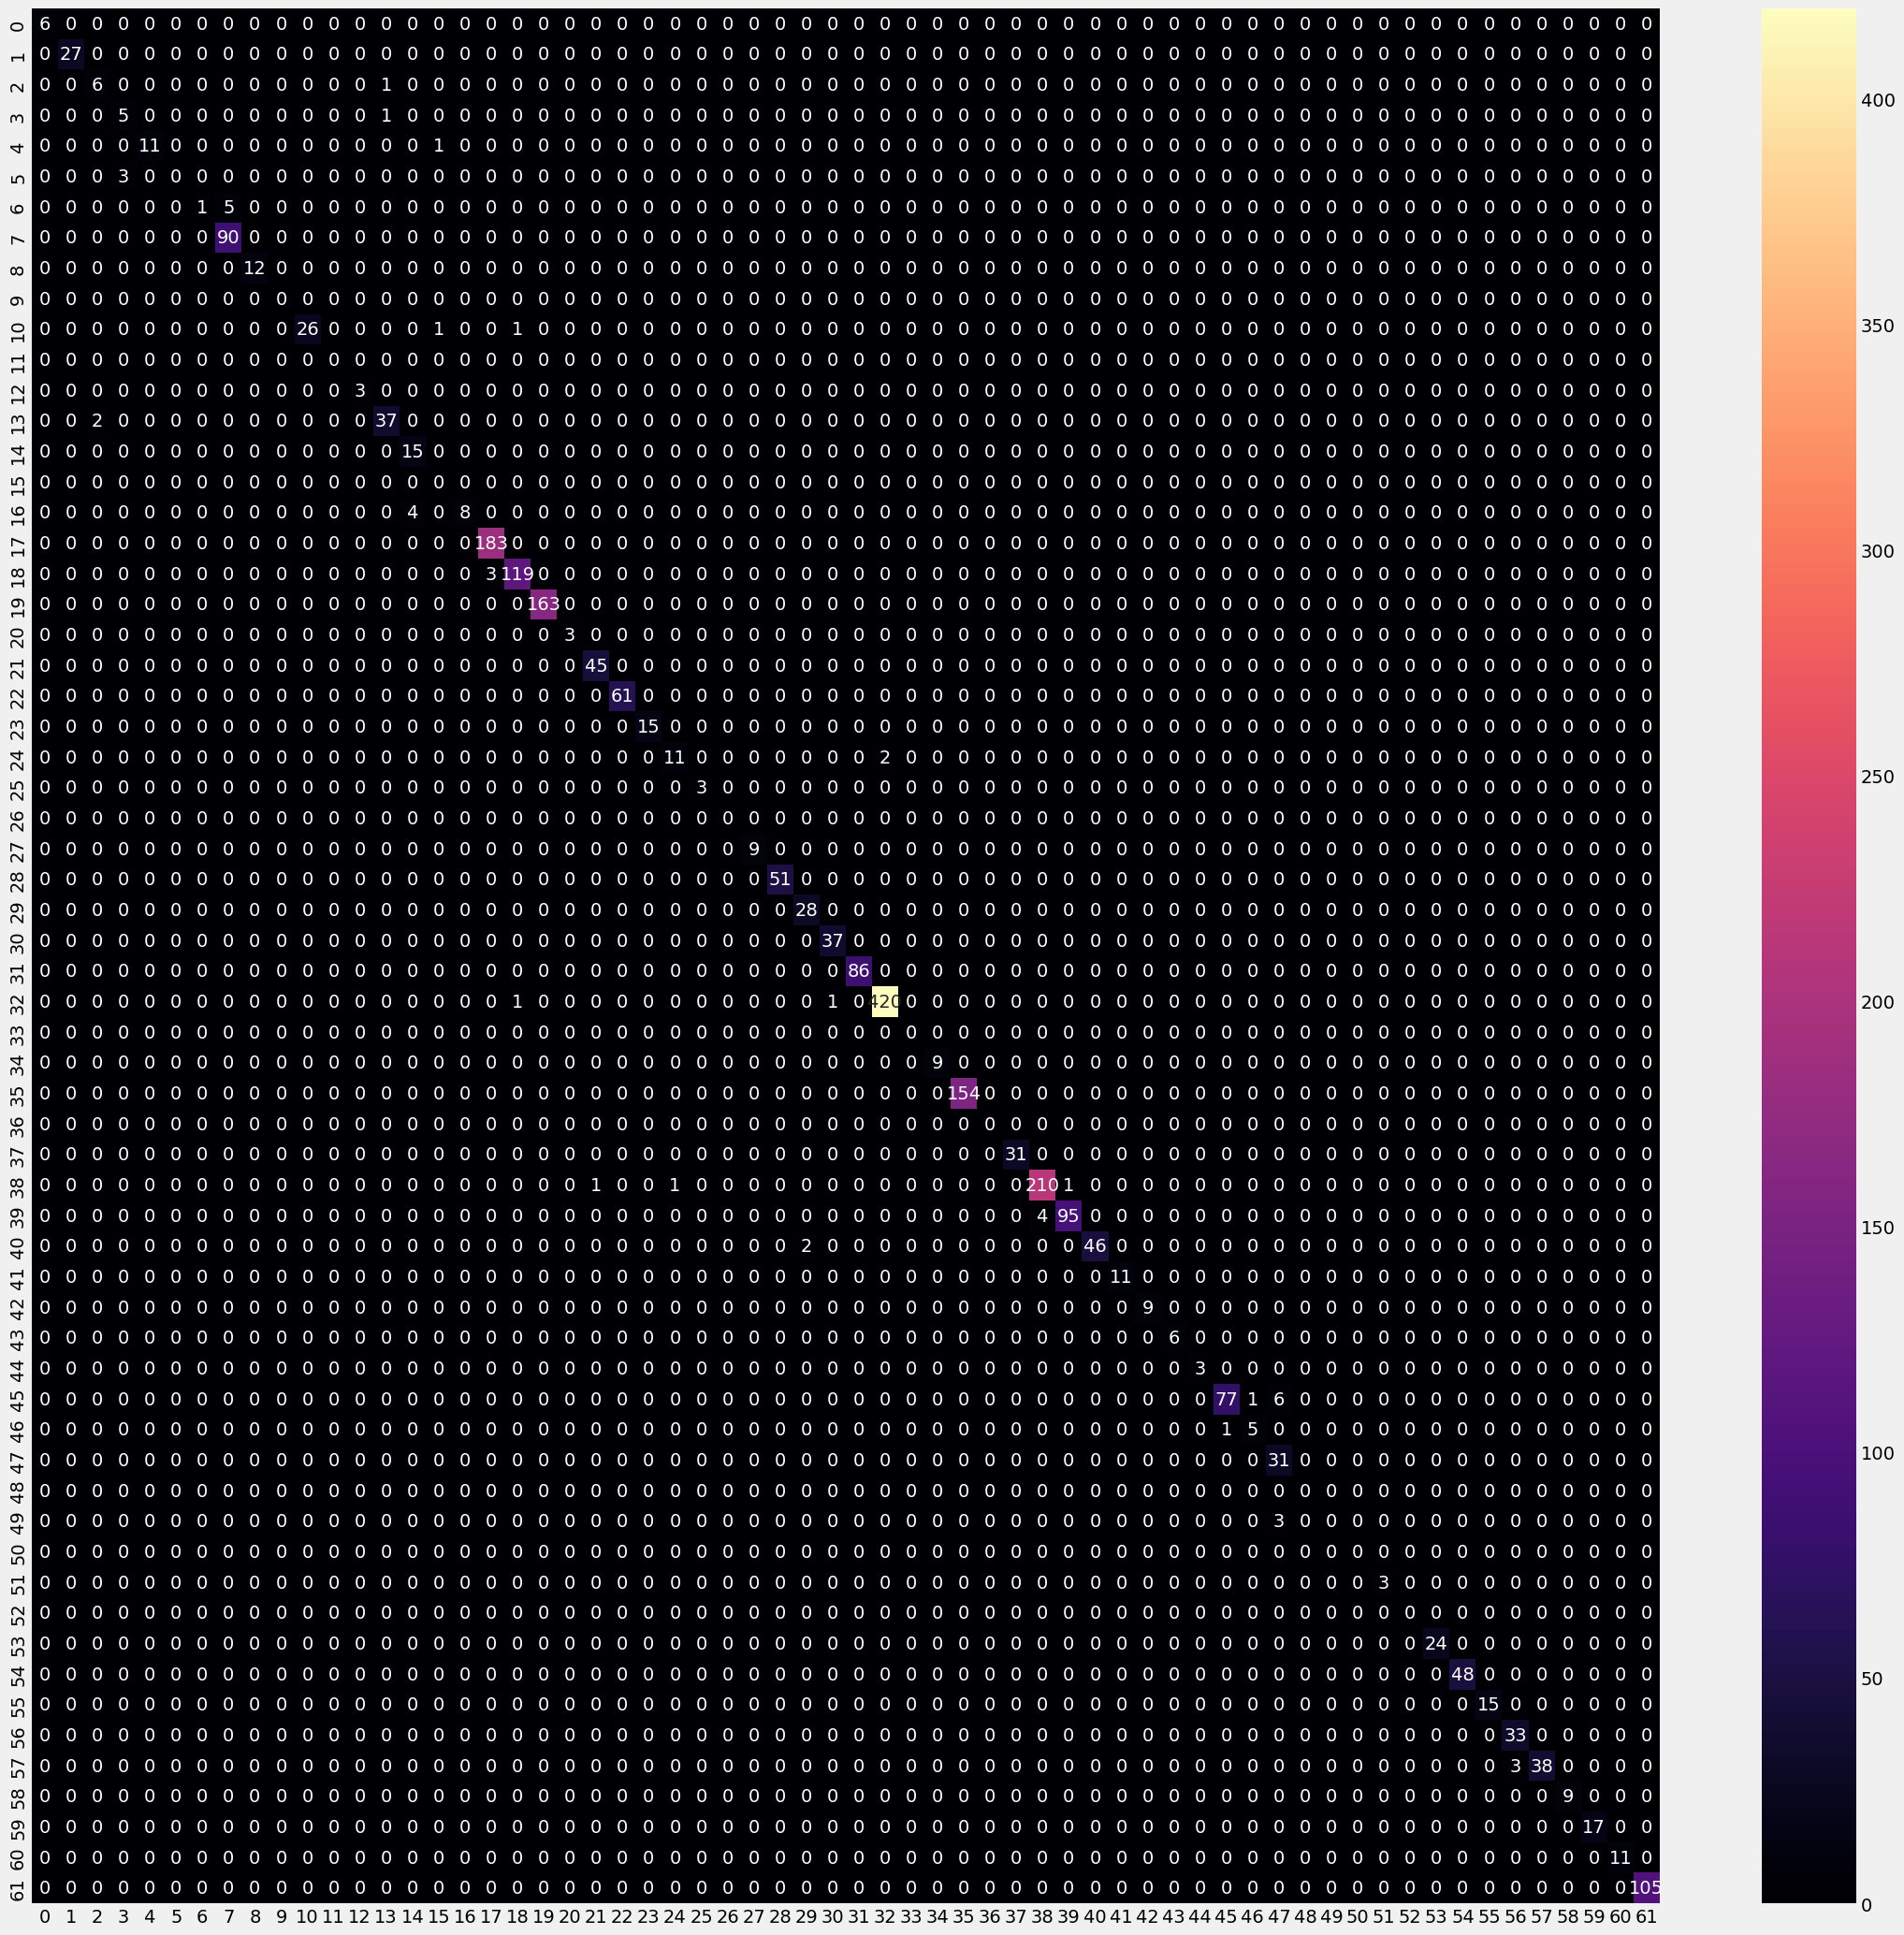

In [78]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(image_labels, pred_classes, labels=range(len(classes)))
import seaborn as sns
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (25,25))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='magma')

### In this cell, I generated a detailed classification report showing precision, recall, and F1-score for each class. The high overall accuracy (98%) and strong metrics across most classes confirm that the model performs very well, with only a few misclassified or underrepresented categories.

In [60]:
from sklearn.metrics import classification_report

print(classification_report(image_labels, pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        27
           2       0.75      0.86      0.80         7
           3       0.62      0.83      0.71         6
           4       1.00      0.92      0.96        12
           5       0.00      0.00      0.00         3
           6       1.00      0.17      0.29         6
           7       0.95      1.00      0.97        90
           8       1.00      1.00      1.00        12
          10       1.00      0.93      0.96        28
          12       1.00      1.00      1.00         3
          13       0.95      0.95      0.95        39
          14       0.79      1.00      0.88        15
          15       0.00      0.00      0.00         0
          16       1.00      0.67      0.80        12
          17       0.98      1.00      0.99       183
          18       0.98      0.98      0.98       122
          19       1.00    

C:\Users\unu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\unu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\unu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\unu\anaconda3\Lib\site-packages\sklearn\metri

# Preditions

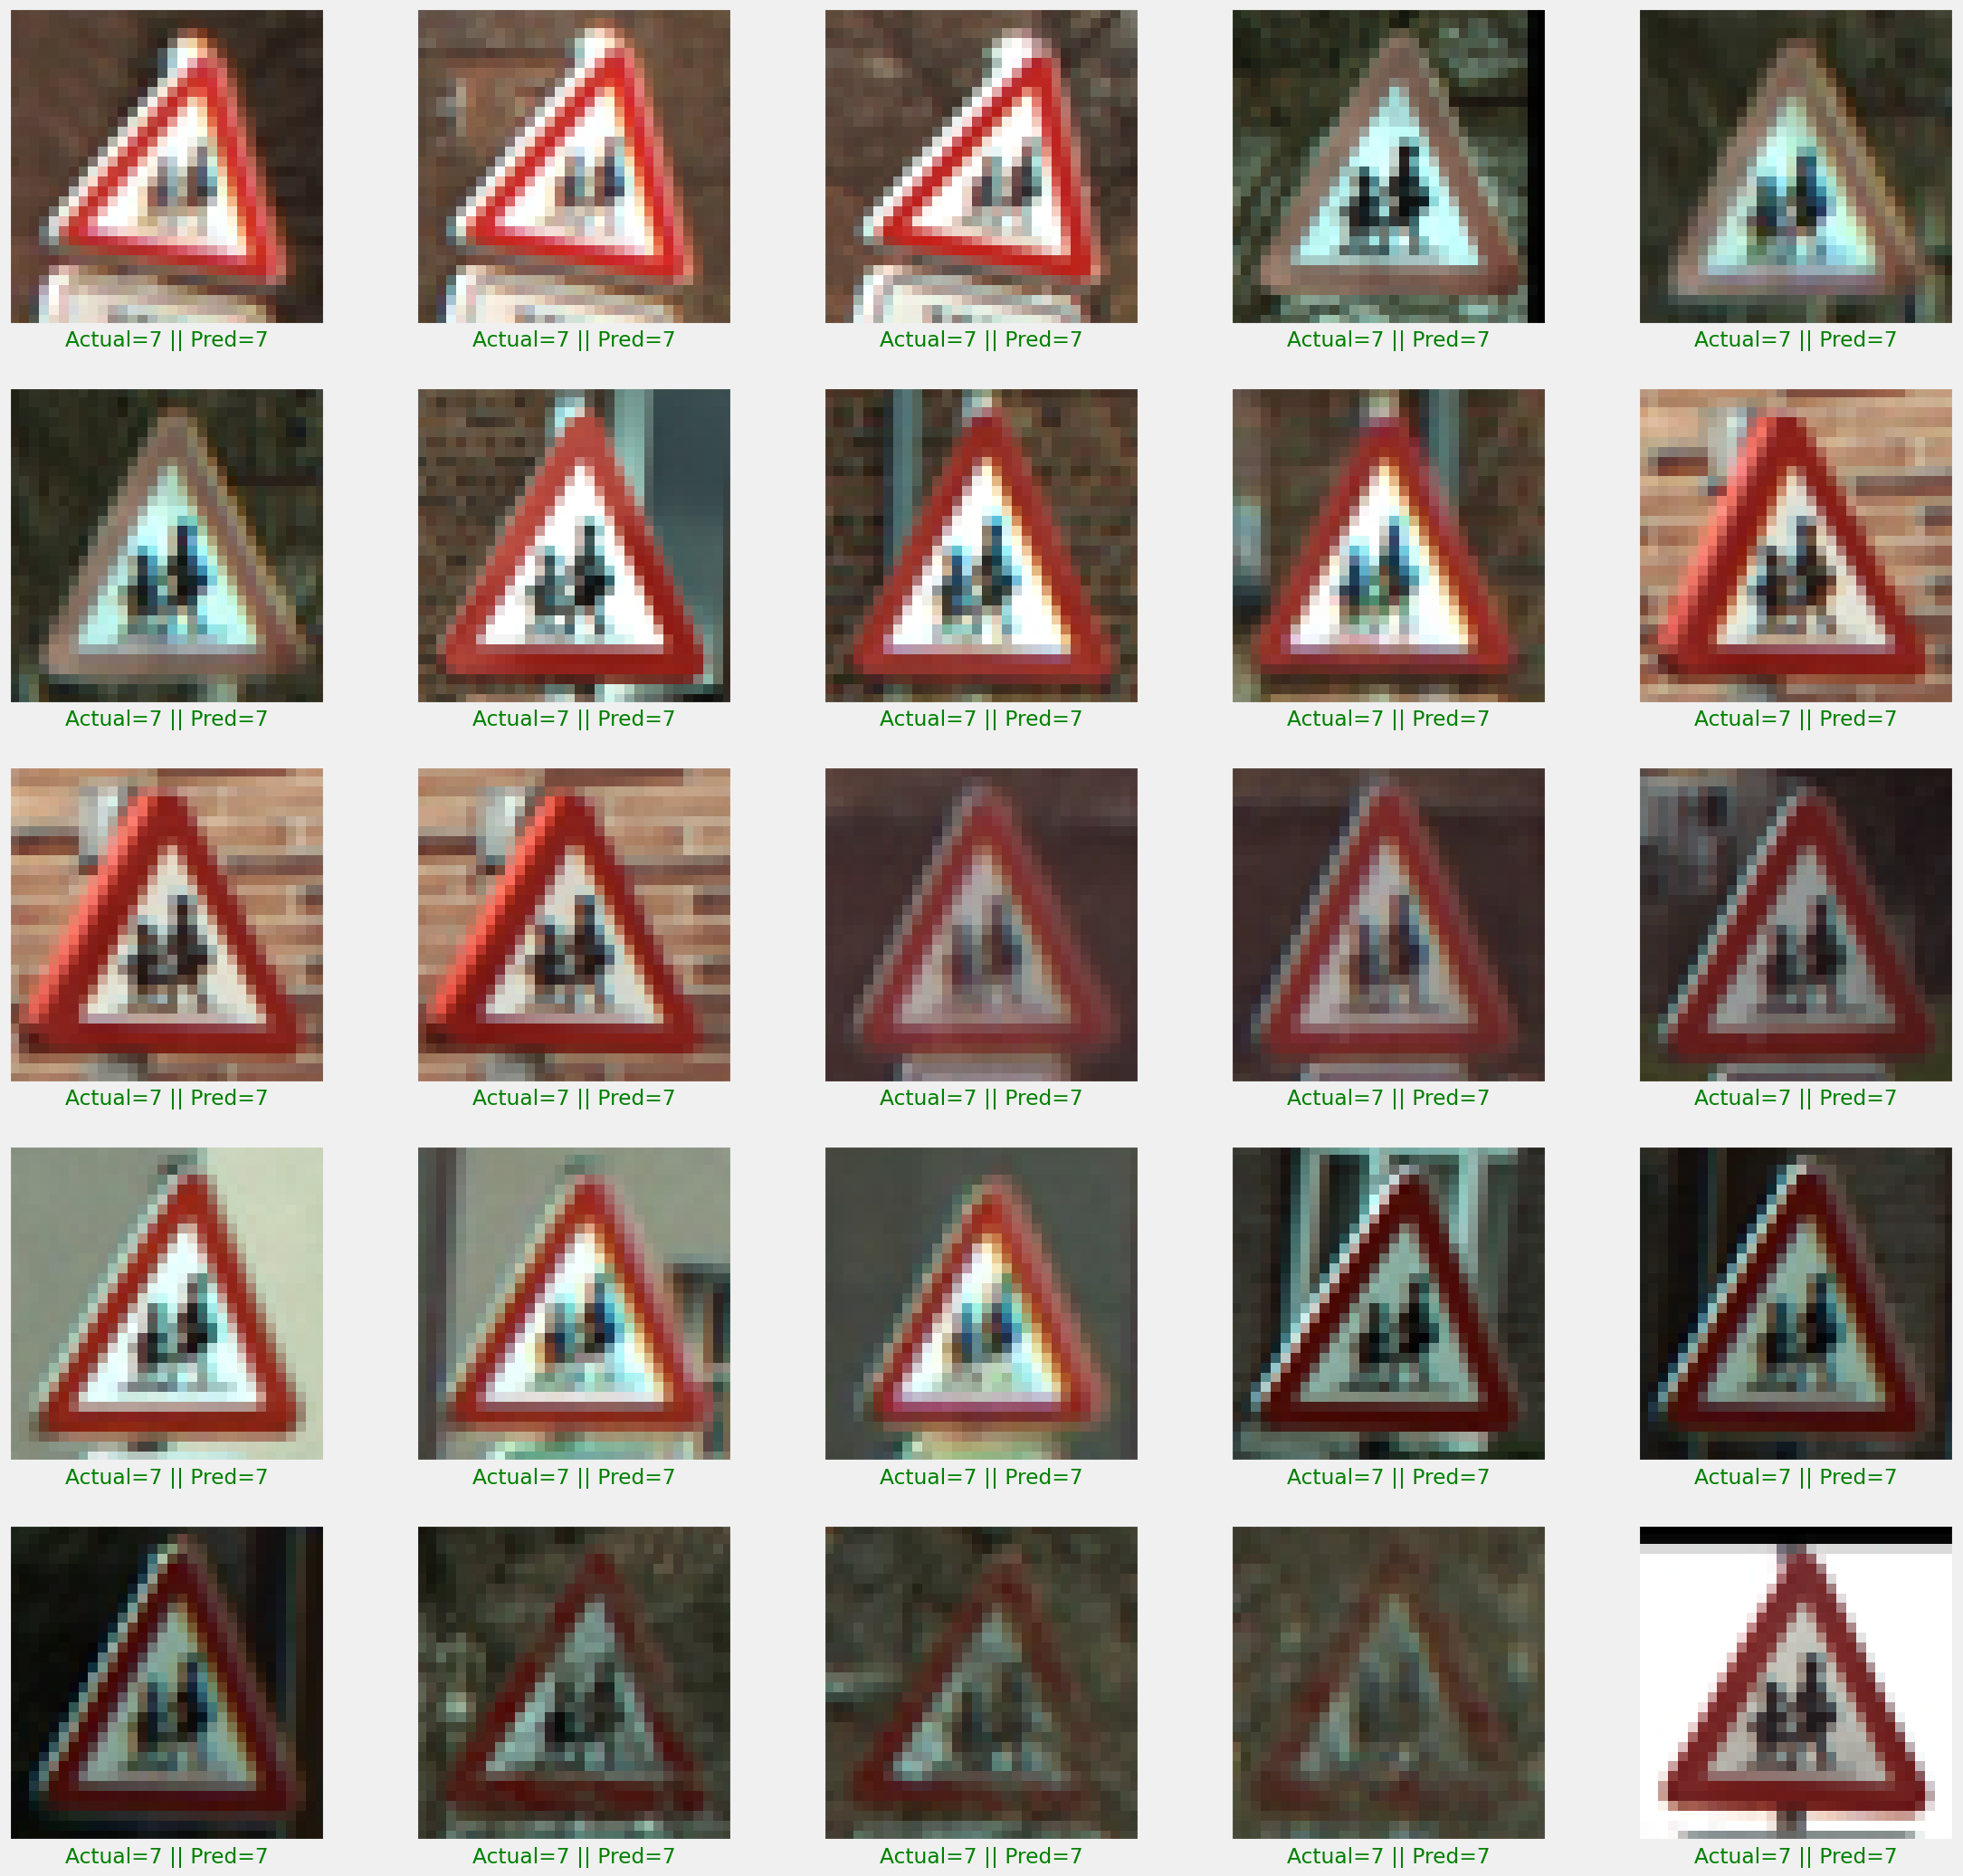

In [86]:
plt.figure(figsize = (25, 25))

start_index = 100
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred_classes[start_index + i]
    actual = image_labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()